## Imports & Setup

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


moghoneim
437157f09c182467c078f8f4728845e5

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as mp


od.download("https://www.kaggle.com/datasets/usdot/flight-delays?resource=download&select=airlines.csv")

#This step required a kaggle account and a key

Skipping, found downloaded files in "./flight-delays" (use force=True to force download)


In [ ]:
# reading the CSV file
airlines = pd.read_csv('/content/flight-delays/airlines.csv')

# displaying the contents of the CSV file
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
# reading the CSV file
airports = pd.read_csv('/content/flight-delays/airports.csv')

# displaying the contents of the CSV file
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
# reading the CSV file
flights = pd.read_csv('/content/flight-delays/flights.csv')

# displaying the contents of the CSV file
flights.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Integration

flights csv and airlines csv have in common: airlines ha "IATA_CODE" & flights has "Airline" (both airline identifiers)
flight and airports: flights has ORIGIN "AIRPORT", Airports has "IATA CODE"

HOWEVER

'Airline' in flights.csv refers to IATA_CODE in airlines.csv, so rename
BUT IATA_CODE in airports.csv is a location identifier, therefore is must be renamed as well.

In [ ]:
airlines.rename(columns = {'AIRLINE':'AIRLINE NAME'}, inplace = True)
airlines.rename(columns = {'IATA_CODE':'AIRLINE'}, inplace = True)

In [ ]:
test_merge = pd.merge(airlines ,flights)

In [ ]:
df = pd.merge(test_merge, airports, left_on="ORIGIN_AIRPORT", right_on="IATA_CODE")

Need to remove the extra column now. (Will do during data cleaning step to remove all the unnecessary columns at once)

# Feature Engineering:

In [ ]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

In [ ]:
# Create new feature Coordinates which combines latitude and longitude
from shapely.geometry import Point

df['Coordinates'] = [Point(xy) for xy in zip(df.LATITUDE, df.LONGITUDE)]

In [ ]:
#Create new column TOTAL_DELAY which combines all delays. We will use this column to create another column
# called 'tolerable delay which return boolean of whether the delay is below a tolerable threshold or not'
df['TOTAL_DELAY'] = df['ARRIVAL_DELAY'] + df['DEPARTURE_DELAY']

In [ ]:
# We will consider an unnacceptable flight delay to exceed 1 hour of total delay according to a google search
df['IS_ACCEPTABLE'] = (df['TOTAL_DELAY'] <= 60)*1

# Data Cleaning

In [ ]:
df.drop(columns = ['IATA_CODE','TAXI_OUT','TAXI_IN','WHEELS_ON','WHEELS_OFF', 'COUNTRY','LONGITUDE' ,'LATITUDE', 'YEAR','DAY','DAY_OF_WEEK', 'AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'CANCELLATION_REASON','FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME'])

,AIRLINE,AIRLINE NAME,MONTH,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,...,DIVERTED,CANCELLED,WEATHER_DELAY,AIRPORT,CITY,STATE,DATE,Coordinates,TOTAL_DELAY,IS_ACCEPTABLE
0,UA,United Air Lines Inc.,1,SFO,IAH,48,42.0,-6.0,218.0,217.0,...,0,0,NaN,San Francisco International Airport,San Francisco,CA,2015-01-01,POINT (37.619 -122.37484),-13.0,1
1,UA,United Air Lines Inc.,1,SFO,DEN,531,550.0,19.0,146.0,153.0,...,0,0,0.0,San Francisco International Airport,San Francisco,CA,2015-01-01,POINT (37.619 -122.37484),45.0,1
2,UA,United Air Lines Inc.,1,SFO,ORD,600,557.0,-3.0,257.0,256.0,...,0,0,NaN,San Francisco International Airport,San Francisco,CA,2015-01-01,POINT (37.619 -122.37484),-7.0,1
3,UA,United Air Lines Inc.,1,SFO,LAX,600,605.0,5.0,88.0,72.0,...,0,0,NaN,San Francisco International Airport,San Francisco,CA,2015-01-01,POINT (37.619 -122.37484),-6.0,1
4,UA,United Air Lines Inc.,1,SFO,EWR,601,552.0,-9.0,331.0,317.0,...,0,0,NaN,San Francisco International Airport,San Francisco,CA,2015-01-01,POINT (37.619 -122.37484),-32.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332909,MQ,American Eagle Airlines Inc.,12,TOL,ORD,1057,1201.0,64.0,81.0,97.0,...,0,0,0.0,Toledo Express Airport,Toledo,OH,2015-12-30,POINT (41.58681 -83.80783),144.0,0
5332910,MQ,American Eagle Airlines Inc.,12,TOL,ORD,1909,1902.0,-7.0,91.0,66.0,...,0,0,NaN,Toledo Express Airport,Toledo,OH,2015-12-30,POINT (41.58681 -83.80783),-39.0,1
5332911,MQ,American Eagle Airlines Inc.,12,TOL,ORD,600,600.0,0.0,73.0,62.0,...,0,0,NaN,Toledo Express Airport,Toledo,OH,2015-12-31,POINT (41.58681 -83.80783),-11.0,1
5332912,MQ,American Eagle Airlines Inc.,12,TOL,ORD,1057,1051.0,-6.0,81.0,85.0,...,0,0,NaN,Toledo Express Airport,Toledo,OH,2015-12-31,POINT (41.58681 -83.80783),-8.0,1


In [ ]:
missing = df.isnull().sum(axis=0).reset_index()
missing.columns = ['Name', 'Number of missing values']

missing['Data Fullness PCT']=(df.shape[0]-missing['Number of missing values'])/df.shape[0]*100

missing.sort_values('Data Fullness PCT').reset_index(drop = True)

,Name,Number of missing values,Data Fullness PCT
0,CANCELLATION_REASON,5245484,1.639441
1,SECURITY_DELAY,4329554,18.814479
2,AIRLINE_DELAY,4329554,18.814479
3,LATE_AIRCRAFT_DELAY,4329554,18.814479
4,WEATHER_DELAY,4329554,18.814479
5,AIR_SYSTEM_DELAY,4329554,18.814479
6,ARRIVAL_DELAY,101784,98.091400
7,TOTAL_DELAY,101784,98.091400
8,AIR_TIME,101784,98.091400
9,ELAPSED_TIME,101784,98.091400


We can tell that MOST of the important columns have very few missing values.

For the few missing values that there are, it is not advisable to fill in the missing values. For example: delays vary incredibly from trip to trip; cancelled or not is boolean that we can't impute because it will affect the dataset. This is why we'll drop the rows with missing values (which will also ease RAM usage)

# Research Question: What are the effects of the weather and date (seasonal effects) flight disturbances (delays and cancellation)

In [ ]:
import numpy as np
acceptable_counts = np.count_nonzero(df['IS_ACCEPTABLE'])

In [ ]:
subset = df.sample(n=20000)

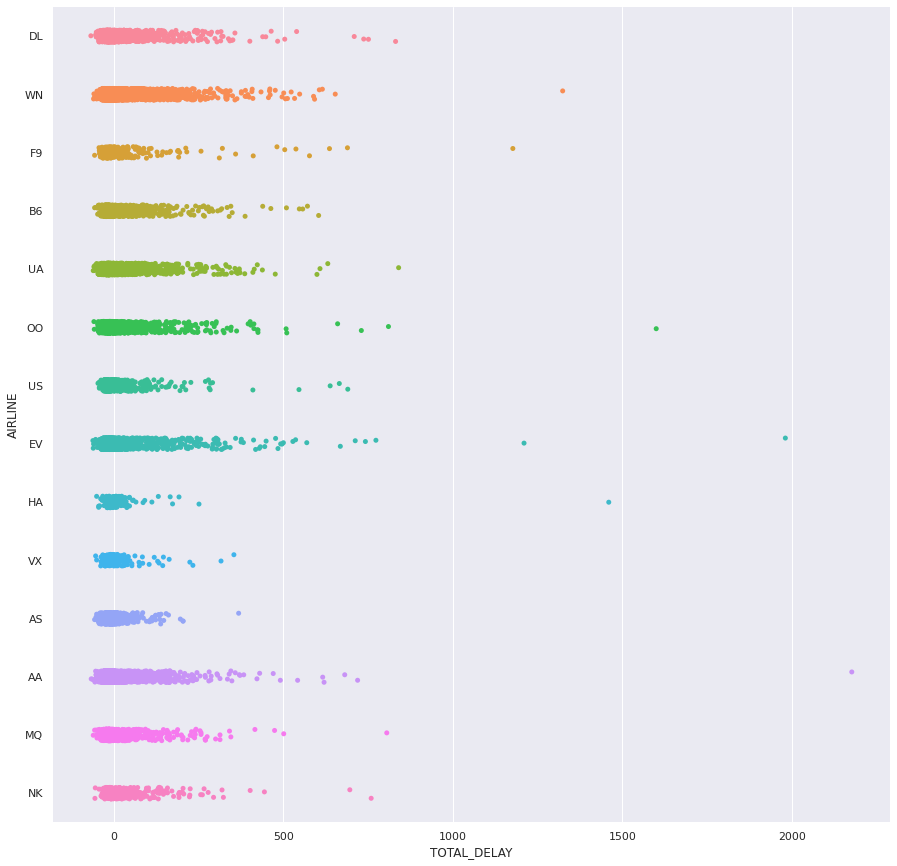

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# initialize the figure
fig_dim = (15,15)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="TOTAL_DELAY", y="AIRLINE",
              data=subset, dodge=True, jitter=True)
#

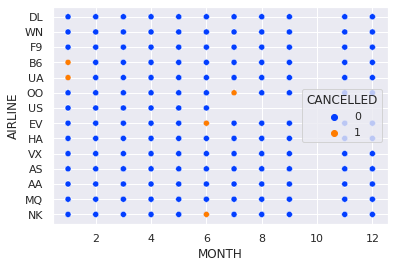

In [ ]:
sns.scatterplot(data=subset, x='MONTH', y='AIRLINE', hue='CANCELLED', palette = 'bright' );


What we can tell from the previous graph:

The following airlines have had the most frequent cancellations: EV, NK and UA.

Most significant delays happened in Jan, June.

September was mostly free of cancellations.

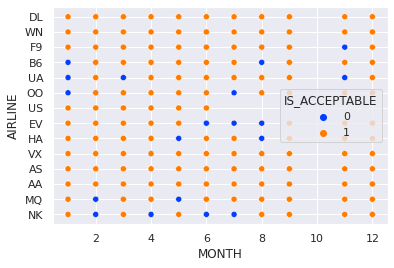

In [ ]:
sns.scatterplot(data=subset, x='MONTH', y='AIRLINE', hue='IS_ACCEPTABLE', palette = 'bright' );


What we can tell from the previous graph:

The following airlines have had the most frequent appearances of total delays that exceed an hour: EV, NK and UA.

Most significant delays happened in Jan, Feb then July and August.

September had the fewest unnacceptable times.
These results also coincide with our previous results.

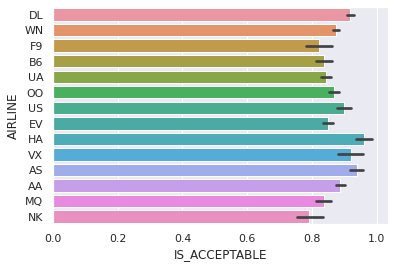

In [ ]:
sns.barplot(y=subset['AIRLINE'], x=subset['IS_ACCEPTABLE']);


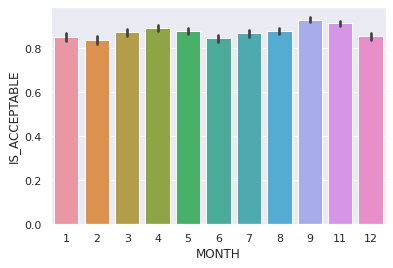

In [ ]:
sns.barplot(y=subset['IS_ACCEPTABLE'], x=subset['MONTH']);


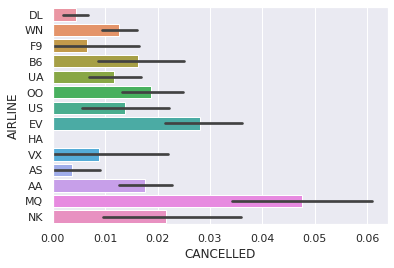

In [ ]:
sns.barplot(y=subset['AIRLINE'], x=subset['CANCELLED']);

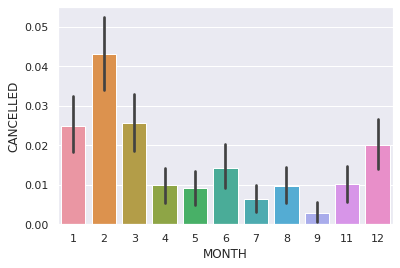

In [ ]:
sns.barplot(y=subset['CANCELLED'], x=subset['MONTH']);

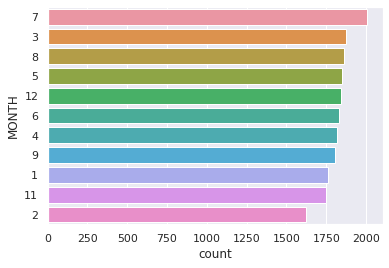

In [ ]:
sns.countplot(y=subset['MONTH'], order=subset['MONTH'].value_counts().index);
# Months with the fewest flights: Winter months, especially February

Conclusions: the months with the most cancellations and disturbances to flights are January and Febuary. The reason being is that blizzards in America and extreme cold conditions occur during the peak of winter.

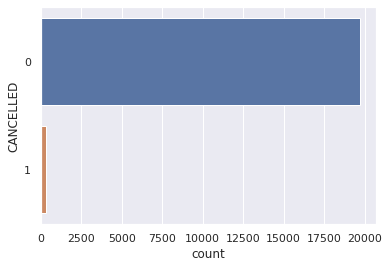

In [ ]:
sns.countplot(y=subset['CANCELLED'], order=subset['CANCELLED'].value_counts().index);